<a href="https://colab.research.google.com/github/MaciejTeleon/TensorFlow/blob/main/Classification_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/MaciejTeleon/TensorFlow/main/cancer_classification.csv'
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


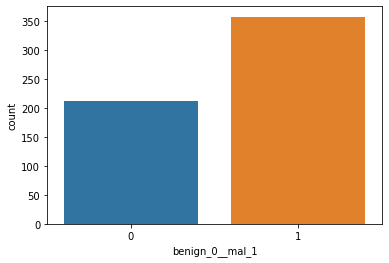

In [8]:
sns.countplot(x='benign_0__mal_1', data=df)

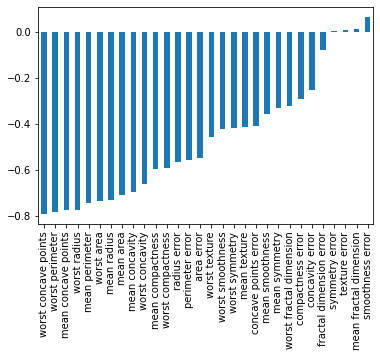

In [12]:
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar')

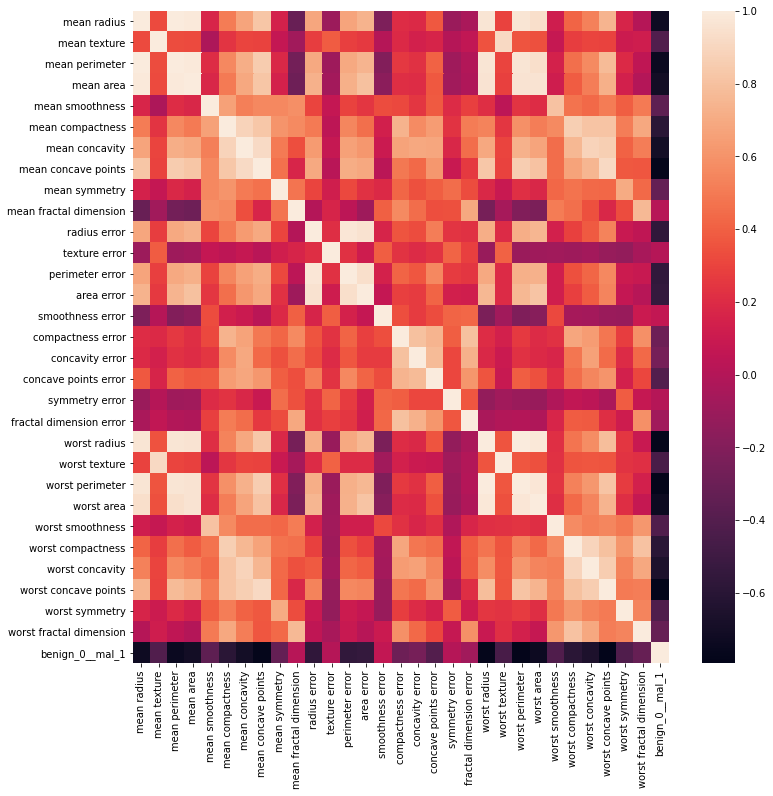

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [17]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [24]:
X_train.shape

(426, 30)

In [25]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [26]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 32ms/step - loss: 0.7035 - val_loss: 0.6654
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6551 - val_loss: 0.6210
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6143 - val_loss: 0.5774
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5675 - val_loss: 0.5256
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5144 - val_loss: 0.4712
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4539 - val_loss: 0.4222
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4224 - val_loss: 0.3734
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3628 - val_loss: 0.3288
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3220 - val_loss: 0.2924
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3058 - val_loss: 0.2652
Epoch 11

In [27]:
losses = pd.DataFrame(model.history.history)

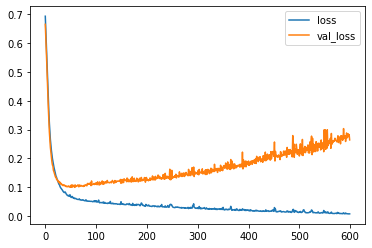

In [28]:
losses.plot()

Adding early stop condition

In [29]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [33]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6976 - val_loss: 0.6821
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6665 - val_loss: 0.6517
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6378 - val_loss: 0.6162
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6047 - val_loss: 0.5726
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5474 - val_loss: 0.5162
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5057 - val_loss: 0.4554
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4487 - val_loss: 0.3958
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4020 - val_loss: 0.3447
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3414 - val_loss: 0.3026
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3043 - val_loss: 0.2637
Epoch 11

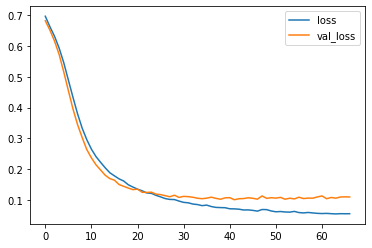

In [34]:
model_loss = pd.DataFrame(model.history.history)

model_loss.plot()

Adding dropout layers

In [35]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [36]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.7608 - val_loss: 0.6949
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6904 - val_loss: 0.6762
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6679 - val_loss: 0.6606
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6766 - val_loss: 0.6450
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6432 - val_loss: 0.6281
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6321 - val_loss: 0.6057
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.5755
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5956 - val_loss: 0.5422
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5765 - val_loss: 0.5116
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5528 - val_loss: 0.4822
Epoch 11

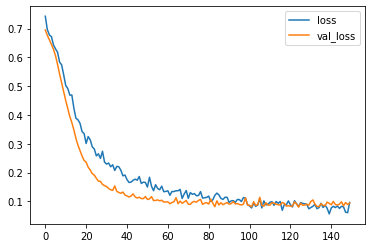

In [37]:
model_loss = pd.DataFrame(model.history.history)

model_loss.plot()

In [39]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [43]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]
